<center>
    <h1>
            Introduction to Python
    </h1></center><p><p>

<h3>Lesson six: Introduction to Machine Learning</h3>

06/05/2019

fabio.grassi@aalto.fi

Today, we begin to examine some basic concepts of machine learning (ML). Broadly speaking, machine learning is a field of study focused on algorithms that can adapt to data to produce a desired output.

There are three main flavors of ML:

* Supervised - The algorithm is given a set of data to learn from, and then uses that information to make predictions about new data.
* Unsupervised - The algorithm is given a set of unlabelled data and looks for patterns and similarities.
* Reinforcement - Learning "from scratch" focused on maximizing a desired outcome.

Today, we are going to introduce the basics of supervised machine learning. Supervised machine learning can itself be divided into **regression**, which is focused on predicting the value of a numeric target (e.g. price, weight, area...), and **classification**, which is used to predict a datapoint's **class** (e.g. species, sex, genre...). In our exercise, we will use the **Titanic dataset**, which contains information on passengers of the Titanic, and we are going to attempt to use that information to predict whether individual passengers survived: a **classification** problem.


![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/2560px-RMS_Titanic_3.jpg)

## 1. Importing the Data

The Titanic dataset can be obtained from several sources. We are going to import it from the Stanford University website using Pandas:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_csv("http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Our dataset contains eight columns:

* Survived - This is our target column, the variable we want to be able to predict.
* Pclass - Passenger class (First, second, third)
* Name
* Sex
* Age
* Siblings/Spouses Aboard
* Parents/Children Aboard
* Fare

## 2. Processing the Data

We can see that two columns, Name and Sex, contain text data. <b><u><font color=#b00000>Machine learning algorithms only process numeric data.</u></b></font> This means that, before we can feed the data to an algorithm, we need to make some changes to our dataset, which depend entirely on our data. In our case, the first non-numeric variable is *Name*. It is probably safe to assume that a passenger's name is a poor predictor for survival, so we are just going to discard this variable. The other one is *Sex*. Let us investigate how it correlates with *Surivival*:

In [16]:
sexsurvived = titanic.groupby(by=["Sex","Survived"]).size() # The size() method returns the number of items.
print(sexsurvived)

Sex     Survived
female  0            81
        1           233
male    0           464
        1           109
dtype: int64


Interesting. Let us now visualize this data.

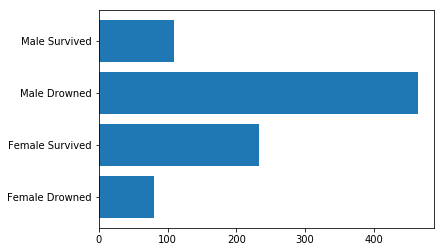

In [17]:
plt.barh([0,1,2,3],
         sexsurvived)
plt.yticks([0,1,2,3],
           labels=["Female Drowned", "Female Survived", "Male Drowned", "Male Survived"])
plt.show()

Many men chose the path of honor on that fateful night.

Sex appears to be correlated with survival rates, and it would be unwise to discard it. We must, however, convert it to a numeric variable for our algorithms to be able to use it. In this case, we can do so by replacing "female" and "male" with 0 and 1:

In [18]:
titanic["Sex"] = [1 if i == "male" else 0 for i in titanic.Sex]
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


Let us now combine this data with passenger class.

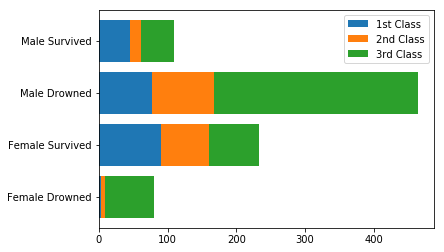

In [19]:
sexsurvived1stclass = np.array(titanic.loc[titanic.Pclass == 1].groupby(by=["Sex","Survived"]).size())
sexsurvived2ndclass = np.array(titanic.loc[titanic.Pclass == 2].groupby(by=["Sex","Survived"]).size())
sexsurvived3rdclass = np.array(titanic.loc[titanic.Pclass == 3].groupby(by=["Sex","Survived"]).size())

plt.barh([0,1,2,3],
         sexsurvived1stclass,
         label = "1st Class")

plt.barh([0,1,2,3],
         sexsurvived2ndclass,
         left = sexsurvived1stclass, # Using "left" option for stacking, to make this bar start where the previous ended.
         label = "2nd Class",)

plt.barh([0,1,2,3],
         sexsurvived3rdclass,
         left = sexsurvived1stclass + sexsurvived2ndclass, # As above.
         label = "3rd Class")

plt.yticks([0,1,2,3],
           labels=["Female Drowned", "Female Survived", "Male Drowned", "Male Survived"])

plt.legend()

plt.show()

To the surprise of exactly no one, the rich seemed to find room on the lifeboats with relative ease, while the plebs were far more likely to sink into Poseidon's cold embrace.

When solving a real world problem, we would probably spend a significant length of time investigating all features and how they  relate to each other and to our target variable, with the goal of dropping the ones we do not need. This is done to avoid the so called **curse of dimensionality**, which means that if we feed too much unrelated information to our model, it will slow it down, and with some (not all) algorithms, it may even negatively affect our model's performance. Because with our toy problem we have so few features and data, and because we have very limited time, we are going to skip this part for now and use all features available. 

Let us now make sure that we do not have any missing values:

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null int64
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.5+ KB


It seems that we have no missing values in our dataset. We are almost ready to start.

## 3. Splitting the Data

One important thing to remember about supervised machine learning is that we should not feed *all* our data to the algorithm. Suppose we were tasked with teaching a boy how to do basic sums, one way we could attempt this is by showing him a lot of sums, e.g:

<p>
<center>
<font color =#0000ff>1+1 = 2</font><br>
    <font color =#9933bb>2+3 = 5</font><br>
    <font color =#006699>7+3 = 10</font><br>
    <font color =#669966>10+1 = 11</font><br>
    <font color =#bbbb33>4+15 = 19</font>
</center>

If we were then to test his progress, we would likely ask the boy to calculate a few sums for us. But what sums? If we ask the boy to calculate the ones we just showed him, i.e. <font color =#0000ff>1+1</font>, <font color =#9933bb>2+3</font>, <font color =#006699>7+3</font>, <font color =#669966>10+1</font>, and <font color =#bbbb33>4+15</font>, how will we know that he did not just memorize those results? If we wanted to be confident that he actually understood the underlying principle, we would need to have him calculate sums he has never encountered before, e.g. <font color=#aa0000><b>15+15</b></font>.

Likewise, in order to measure the performance of our model, we need to test it on some data it has never seen before. This is why it is common practice to split the dataset into **training** and **test** data. Lucky for us, this is easily accomplished using the tools available in one of the most popular Python machine learning libraries, **scikit-learn**:

In [21]:
from sklearn.model_selection import train_test_split

features = ["Pclass", "Sex", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"]

traindata, testdata, traintarget, testtarget = train_test_split(titanic[features],
                                                                titanic.Survived, 
                                                                random_state=10)

# random_state is an optional argument to ensure that the same split is generated every time,
# for reproducibility.

Now that our data is nicely split, there is one last step before we can run it through an algorithm: scaling. Scaling can be easily understood by looking at the values of *Siblings/Spouses Aboard* and *Fare*: the former only has values ranging from 0 to 8 and a standard deviation of 1.1, while the latter goes all the way up to 500 and has a standard deviation of 49.8. This could mean that *Fare* will play a more important role than it should, because some algorithms use euclidean distances. By scaling our data, ensure that they all have the same influence.

A very common (but definitely not the only) way to rescale the data is to use scikit-learn's *StandardScaler*. As with many other scikit-learn modules, we will first use its *fit_transform* method to rescale based on the training data, and subsequently we will use the *transform* method on the test data.

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
sstraindata = ss.fit_transform(traindata)
sstestdata = ss.transform(testdata)

C:\Users\grassif1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\grassif1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\grassif1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


We are finally ready to try some algorithms. According to the **no free lunch theorem**, there is no sure way of knowing which algorithm will work best for your data, so as a general rule, it is a good idea to try several, and see which one has the best performance. Today, we are going to try Logistic Regression, Random Forest, Support Vector Classifier, and K-Nearest Neighbors.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [24]:
l = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()

In [25]:
l.fit(sstraindata,traintarget)
rf.fit(sstraindata,traintarget)
svc.fit(sstraindata,traintarget)
knn.fit(sstraindata,traintarget)

C:\Users\grassif1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grassif1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

And now, let us see how well our algorithms did. We are going to use two metrics: confusion matrix, and accuracy score.

The confusion matrix is a square, n by n matrix, with n being the number of outcome classes, where every row tells us, for the elements of every class, what our algorithms classified them as. The diagonal elements represent the correct ones, the off diagonal elements are the misclassified data points. Example: suppose we were predicting whether a sports game will end with a win for the home team ("H"), a win for the away team ("A"), or a draw ("D"). Our confusion matrix could look something like this:

       H  A  D
    H 11, 1, 3
    A 5, 35, 1
    D 9, 6, 34
    
This would mean that our algorithm correctly classified 11 H as H, while it incorrectly classified one H as A, and 3 H as D. It classified 5 A as H, 35 A as A, and one A as D, and so on.

Accuracy score is the fraction of correctly classified items (in the example above, (11 + 34 + 35)/100 = 0.8).

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Logistic Regression Confusion Matrix:\n",
      confusion_matrix(testtarget, l.predict(sstestdata)),
      "\nAccuracy:\n",
      accuracy_score(testtarget,l.predict(sstestdata)),
      "\n"
     )
print("Random Forest Confusion Matrix:\n",
      confusion_matrix(testtarget, rf.predict(sstestdata)),
      "\nAccuracy:\n",
      accuracy_score(testtarget,rf.predict(sstestdata)),
      "\n"
     )
print("SVC Confusion Matrix:\n",
      confusion_matrix(testtarget, svc.predict(sstestdata)),
      "\nAccuracy:\n",
      accuracy_score(testtarget,svc.predict(sstestdata)),
      "\n"
     )
print("KNN Confusion Matrix:\n",
      confusion_matrix(testtarget, knn.predict(sstestdata)),
      "\nAccuracy:\n",
      accuracy_score(testtarget,knn.predict(sstestdata)),
      "\n"
     )

Logistic Regression Confusion Matrix:
 [[123  18]
 [ 26  55]] 
Accuracy:
 0.8018018018018018 

Random Forest Confusion Matrix:
 [[124  17]
 [ 29  52]] 
Accuracy:
 0.7927927927927928 

SVC Confusion Matrix:
 [[127  14]
 [ 25  56]] 
Accuracy:
 0.8243243243243243 

KNN Confusion Matrix:
 [[115  26]
 [ 23  58]] 
Accuracy:
 0.7792792792792793 



And now, let's try with the non-scaled data...

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

l.fit(traindata,traintarget)
rf.fit(traindata,traintarget)
svc.fit(traindata,traintarget)
knn.fit(traindata,traintarget)

print("Logistic Regression Confusion Matrix:\n",
      confusion_matrix(testtarget, l.predict(testdata)),
      "\nAccuracy:\n",
      accuracy_score(testtarget,l.predict(testdata)),
      "\n"
     )
print("Random Forest Confusion Matrix:\n",
      confusion_matrix(testtarget, rf.predict(testdata)),
      "\nAccuracy:\n",
      accuracy_score(testtarget,rf.predict(testdata)),
      "\n"
     )
print("SVC Confusion Matrix:\n",
      confusion_matrix(testtarget, svc.predict(testdata)),
      "\nAccuracy:\n",
      accuracy_score(testtarget,svc.predict(testdata)),
      "\n"
     )
print("KNN Confusion Matrix:\n",
      confusion_matrix(testtarget, knn.predict(testdata)),
      "\nAccuracy:\n",
      accuracy_score(testtarget,knn.predict(testdata)),
      "\n"
     )

Logistic Regression Confusion Matrix:
 [[126  15]
 [ 28  53]] 
Accuracy:
 0.8063063063063063 

Random Forest Confusion Matrix:
 [[119  22]
 [ 30  51]] 
Accuracy:
 0.7657657657657657 

SVC Confusion Matrix:
 [[115  26]
 [ 52  29]] 
Accuracy:
 0.6486486486486487 

KNN Confusion Matrix:
 [[100  41]
 [ 33  48]] 
Accuracy:
 0.6666666666666666 



C:\Users\grassif1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grassif1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


As you can see, we get mixed results. Some algorithms are more robust to unscaled data than others, for example the performance of the Logistic Regression (+0.5%) and Random Forest (-0.4%) algorithms was virtually unchanged. SVC on the other hand went from being the best performing to the worst algorithm, with a drop in accuracy of over 17%. KNN also reported a noticeable decrease in accuracy (13%).

This is not the end of a machine learning project: normally, at this point we would then reiterate the process, try some feature engineering, use the information we can extract from our results to improve the models, and fine tune our model's parameters, as we will see in future lectures.

In [15]:
a = """Ability to learn new things
It has been clear to me what I am expected to learn on the courses.
Basic education
I feel that I am losing interest in my studies.
I have been satisfied with the teaching methods used.
Ability to act ethically
I often sleep badly because of matters related to my studies.
I am certain I can understand even the most difficult material in my studies.
Ability to work internationally
Ability in your minor subject studies
I have learned to analyse and categorise information.
Ability in your major subject / programme
My survey responses will be kept confidential and they can be used for research purposes.
Skills in human resources / management
What we are taught seems to match what we are supposed to learn.
The set work (final exams, exercises etc.) has helped me to make connections between the things I am studying and my existing knowledge.
The feedback given on my assigned work has helped me to clarify things I had not fully understood.
Mathematical and natural science skills
If you answered Yes to the question above, what are the reasons for your studies being delayed? You may choose a maximum of three (3) options from the list below.
Which degree programme have you graduated from or are going to graduate from?
Overall, I have been systematic and organised in my studying.
The pressure of my studies causes problems in my close relationships with others.
I am satisfied with my studies.
Self-knowledge
Communication skills in the second national language (Finnish or Swedish)
I have received enough feedback about my learning.
My studies have developed my collaboration skills.
I have been satisfied with the communication I have had with the teaching staff.
I have often had to repeat things in order to learn them.
My education has met the set goals.
I feel a lack of study motivation and often think of giving up.
I have planned my studies so that I can fit everything in.
Entrepreneurial skills
What other reasons were there that you feel delayed your studies?
I believe I will do well in my studies.
I have organised my study time carefully to make the best use of it.
Information retrieval skills
If you answered Yes to the question above, please estimate how many months your working has slowed down or accelerated your studies:
The competences I have developed in my education meet my expectations.
I expect to do well in my studies.
NULL
Entrepreneurial skills, theoretical knowledge
I believe that I have been able to work comfortably with other students during courses.
It has been easy for me to find information and support regarding different aspects of my studies.
My survey responses can be enriched with student register data if needed for research use.
I have learned to apply theoretical knowledge to practice.
Know-how related to my field of study
I have tried to relate what I learn in one course to what I have learned in other courses.
I feel overwhelmed by the work related to my studies.
I feel comfortable at my university.
During my studies I have tried to relate new material to my previous knowledge.
I am continually wondering whether my studies have any meaning.
I have learned how to present my views in different interaction situations.
General knowledge of economics
The feedback given on my work has helped me to improve my ways of learning and studying.
Competence in sustainability
I used to expect I would achieve much more in my studies than I expect now.
Studying at the university has developed my skills in acting as a member of a group.
Much of what I have learned seems nothing more than unrelated bits and pieces.
IT skills
Do you feel that your studies were delayed for some reason?
Has working during your studies affected the progress of your studies?
Ideas and perspectives I came across during my studies have made me contemplate them afterwards.
I can see the relevance of what we have been taught.
The teaching has been, to a large extent, of good quality.
During my free time I worry over matters related to my studies.
Competence in sustainable development
Ability to present in public
I have learned to present arguments for my thoughts.
There has been sufficient guidance available for the organisation of my studies.
I have got support and help from other students when I have needed it.
What is your major / specialisation track?
The feedback I received from the teaching staff has helped me with my studies.
General leadership skills
It has been clear to me what has been expected of me in final exams, exercises, essays, course presentations etc.
I am certain I can learn the skills required in my study field.
I have learned to solve problems in practical situations.
When needed, I have found a person whom to ask for help.
There has been sufficient guidance available for the preparation of my bachelor’s thesis or final exam.
Gender
I have been satisfied with the opportunities I had to influence and participate in my study programme (e.g. participating in curriculum planning, and opportunities to give feedback).
I have carefully looked for evidence to reach my own conclusions about what I am studying.
I have often had trouble in making sense of the things I have to learn.
Skills related to an international working environment
I often have feelings of inadequacy in my studies.
Communication skills in your native language (Finnish or Swedish)
Most of what I have learned on courses has been really interesting.
If you like, give feedback to your university.
During my bachelor’s studies, I worked for a total of (months):
I am satisfied with the education I got in my bachelor’s studies.
I have learned to see things from different points of view.
It has been easy to see how the assigned tasks and work have been related to what I am expected to learn.
Bachelor’s studies gave me sufficient readiness to choose master’s levels studies.
Skills in time management and prioritizing tasks
During my bachelor’s studies, I worked abroad for a total of (months):
What could your university have done to help your studies progress more smoothly?
Age
I have put a lot of effort into my studies.
I am confident I can understand the basic concepts of my discipline.
How useful has the study-related practice / work experience you gained during your bachelor’s studies been in the development of your abilities?  The used scale is: 5= Very useful; 4= Useful; 3= Only a little useful; 2= Not useful at all.
I have enjoyed participating in courses.
The things I need to learn have seemed so complicated that I have had difficulties in understanding them.
Talking with other students has helped me understand things better.
Communication skills in languages other than Finnish / Swedish
Entrepreneurial skills, attitudinal
Critical thinking skills
Of the work I did during my bachelor’s studies, ____ months were related to my line of studies:"""

In [16]:
a.split("\n")

['Ability to learn new things',
 'It has been clear to me what I am expected to learn on the courses.',
 'Basic education',
 'I feel that I am losing interest in my studies.',
 'I have been satisfied with the teaching methods used.',
 'Ability to act ethically',
 'I often sleep badly because of matters related to my studies.',
 'I am certain I can understand even the most difficult material in my studies.',
 'Ability to work internationally',
 'Ability in your minor subject studies',
 'I have learned to analyse and categorise information.',
 'Ability in your major subject / programme',
 'My survey responses will be kept confidential and they can be used for research purposes.',
 'Skills in human resources / management',
 'What we are taught seems to match what we are supposed to learn.',
 'The set work (final exams, exercises etc.) has helped me to make connections between the things I am studying and my existing knowledge.',
 'The feedback given on my assigned work has helped me to cl